In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"


# Some plotting config
sns.set(
    context="notebook",
    # style="ticks",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.5,
)
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
# plt.rcParams["xtick.bottom"] = True
# plt.rcParams["ytick.left"] = True
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.fontset"] = "cm"

from scipy.stats import binned_statistic

In [2]:
data = pd.read_csv("/home/peter/research/47-tuc-pulsar-fitting/notebooks/47Tuc.csv")
data.head()

,x,y,z,vx,vy,vz,mass,type
0,-1.479036,-6.269778,-24.813127,-1.863882,0.638368,-11.748353,0.118467,1.0
1,-1.557603,8.548289,1.805334,-6.614849,8.222135,0.536496,0.118467,1.0
2,0.288075,9.726241,-1.900443,1.743947,-0.095768,-2.373282,0.118467,1.0
3,7.672425,-2.773247,-6.980231,-6.213951,-0.698677,-12.633382,0.118467,1.0
4,3.044291,8.275238,6.665430,1.614730,-13.725675,3.292908,0.118467,1.0


In [3]:
data["r"] = np.sqrt(data.x**2 + data.y**2 + data.z**2)

In [4]:
sort_idx = np.argsort(data.r)

In [5]:
data.sort_values("mass")

,x,y,z,vx,vy,vz,mass,type,r
0,-1.479036,-6.269778,-24.813127,-1.863882,0.638368,-11.748353,0.118467,1.0,25.635696
75990,6.118833,-1.682137,-2.499204,7.138200,-3.694892,3.275575,0.118467,1.0,6.820243
75989,-38.015524,5.886700,7.867496,1.944502,-2.024130,-4.525128,0.118467,1.0,39.264880
75988,-6.698995,-16.313981,11.088310,-9.930819,4.469772,1.351352,0.118467,1.0,20.832022
75987,4.141796,-0.397398,-2.205212,-6.394998,-10.169086,-21.169573,0.118467,1.0,4.709072
...,...,...,...,...,...,...,...,...,...
1726864,-0.124305,-0.124865,0.017542,2.103576,6.037834,6.390812,7.058784,5.0,0.177061
1726863,0.208532,-0.102989,0.061036,1.445100,0.412396,9.769983,7.058784,5.0,0.240453
1726862,-0.027959,0.066826,0.022426,-3.901048,-0.678244,-1.718351,7.058784,5.0,0.075831
1726869,-0.039120,-0.096623,0.162835,-5.158395,0.990295,3.177136,7.058784,5.0,0.193343


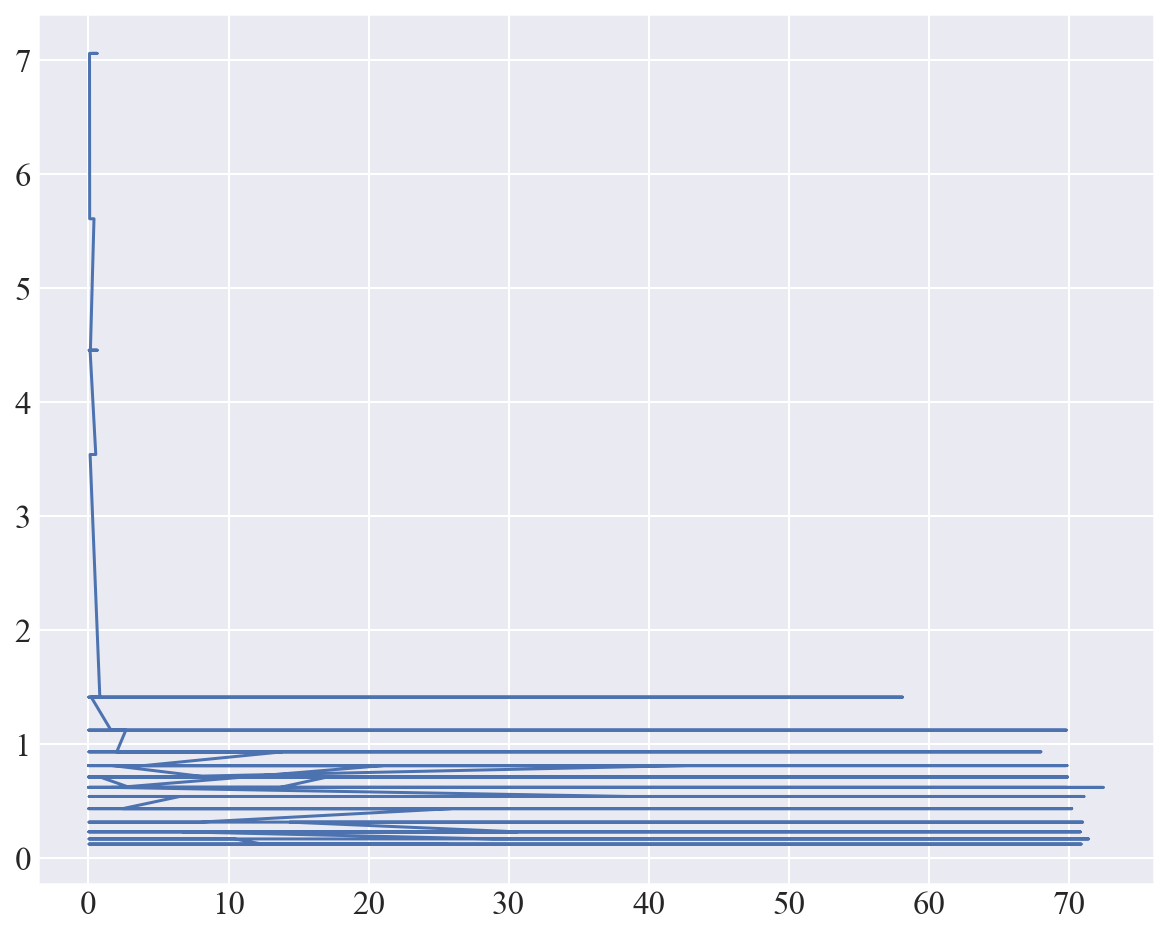

In [6]:
plt.plot(data.r,data.mass)

In [7]:
stats = binned_statistic(data.r,data.mass,bins=70)

In [8]:
len(stats[0])

70

In [9]:
bin_centers = np.array(
            [(stats[1][i] + stats[1][i + 1]) / 2 for i in range(len(stats[1]) - 1)]
        )

In [10]:
plt.rcParams.update({
  "text.usetex": True,
})

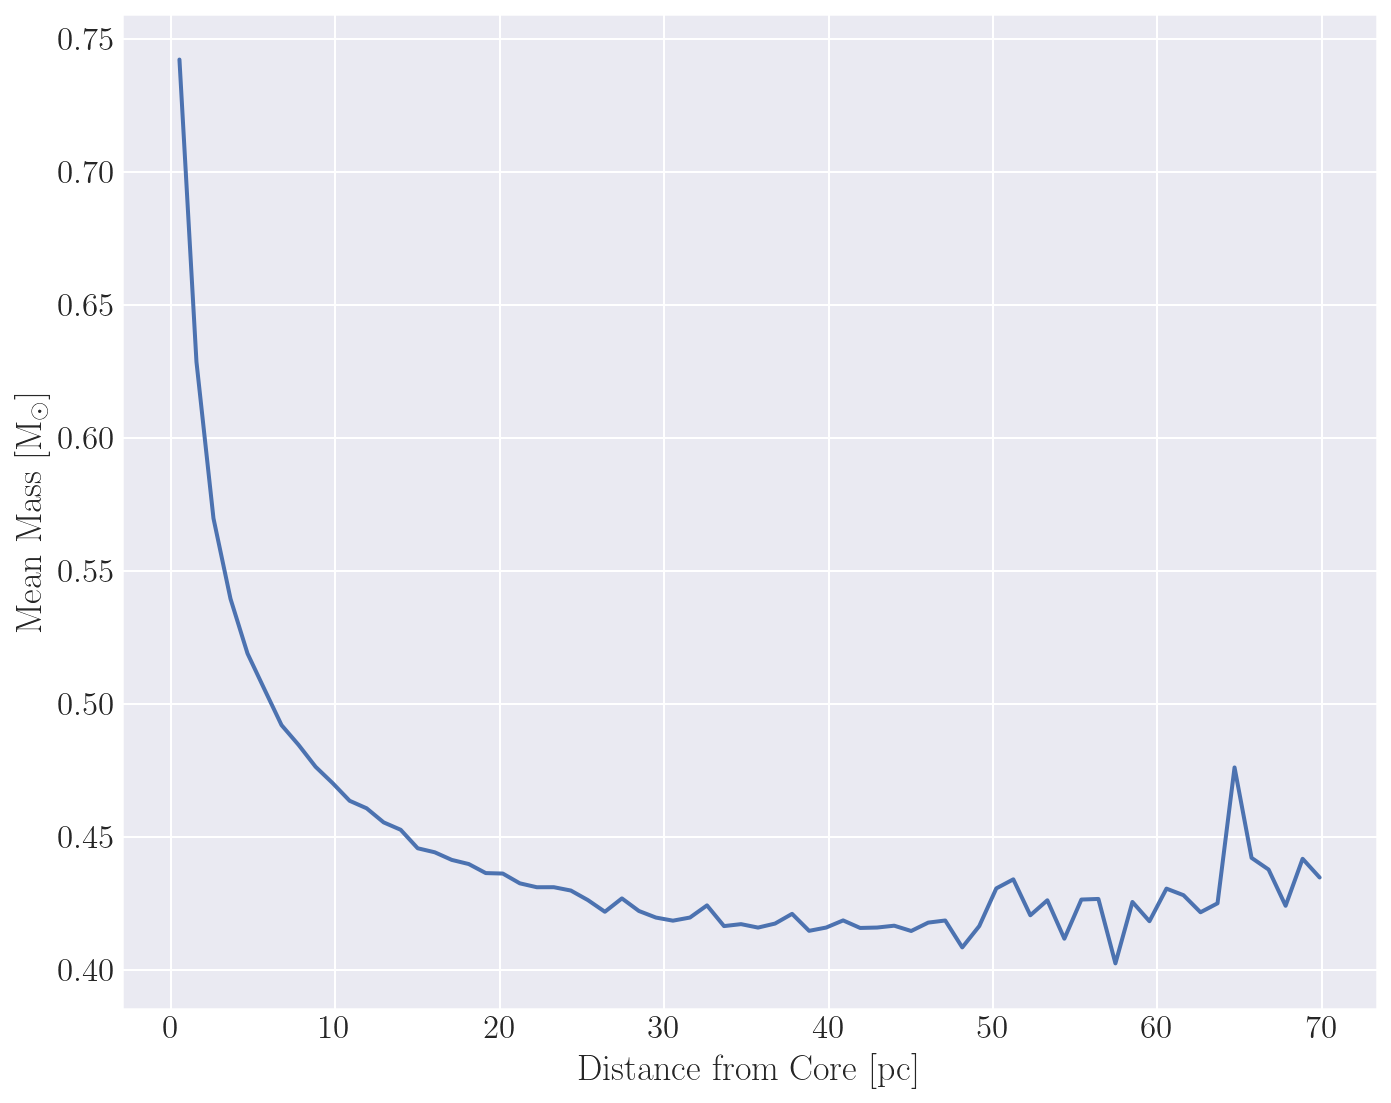

In [14]:
plt.figure()
sns.lineplot(x=bin_centers[:-2],y=stats[0][:-2],lw=2)
plt.xlabel(r"Distance from Core [pc]")
plt.ylabel(r"Mean Mass [$\mathrm{M}_\odot$]")
plt.tight_layout()
plt.savefig("radial_mean_mass.png",dpi=300)